# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

### Dependencies

In [3]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score 

### Importing and Preparing Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Convert date column to a numeric column

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)

### Split into Train and Test Data

In [6]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)

print(train.shape, test.shape)

(17290, 21) (4323, 21)


# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



### Bivariate Regression

In [7]:
feature = ['sqft_living15']
target = ['price']

In [8]:
model = LinearRegression()
model.fit(train[feature], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
model.coef_, model.intercept_

(array([[309.16485248]]), array([-75276.35065315]))

In [10]:
train['predictions'] = model.predict(train[feature]).round()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predictions
6325,5467910190,735380,325000.0,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095,774927.0
13473,9331800580,735667,257000.0,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000,317363.0
17614,2407000405,735655,228500.0,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800,286447.0
16970,5466700290,735606,288000.0,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350,481220.0
20868,3026059361,735705,479000.0,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454,570878.0


In [12]:
train_true = train[target]
train_pred = model.predict(train[feature])

test_true = test[target]
test_pred = model.predict(test[feature])

In [13]:
print('Train:')
# Train Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_true=train_true, y_pred=train_pred) )
# Train R Squared
print('R Squared: ', r2_score(y_true=train_true, y_pred=train_pred) )
print('Test:')
# Test Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_true=test_true, y_pred=test_pred) )
# Test R Squared
print('R Squared: ', r2_score(y_true=test_true, y_pred=test_pred) )

Train:
Mean Squared Error:  86293292037.16771
R Squared:  0.3395008981821991
Test:
Mean Squared Error:  97841202861.70013
R Squared:  0.3528024164498089


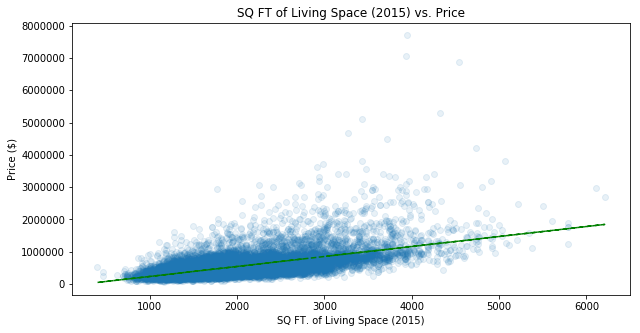

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(train[feature], train[target], alpha=0.1)
plt.plot(train[feature], train['predictions'], '--', color='g')
plt.title('SQ FT of Living Space (2015) vs. Price')
plt.xlabel('SQ FT. of Living Space (2015)')
plt.ylabel('Price ($)')
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [15]:
features = ['sqft_living15', 'grade']
target = ['price']

In [16]:
multiple = LinearRegression()
multiple.fit(train[features], train[target])
multiple.coef_, multiple.intercept_

(array([[1.19199123e+02, 1.56342924e+05]]), array([-895217.12857183]))

In [17]:
train_true = train[target]
train_pred = multiple.predict(train[features])

test_true = test[target]
test_pred = multiple.predict(test[features])

In [18]:
print('Train:')
# Train Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_true=train_true, y_pred=train_pred) )
# Train R Squared
print('R Squared: ', r2_score(y_true=train_true, y_pred=train_pred) )
print('Test:')
# Test Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_true=test_true, y_pred=test_pred) )
# Test R Squared
print('R Squared: ', r2_score(y_true=test_true, y_pred=test_pred) )

Train:
Mean Squared Error:  69560947382.89378
R Squared:  0.46757225059617
Test:
Mean Squared Error:  79094406122.34308
R Squared:  0.4768082666862219


In [28]:
train['sqft_living15'].head()

6325     2750
13473    1270
17614    1170
16970    1800
20868    2090
Name: sqft_living15, dtype: int64

Visualization Attempt

[[-306250. 8081250.]
 [-306250. 8081250.]] [[ 108.45  108.45]
 [6500.55 6500.55]]
[[-0.055]
 [ 0.055]]


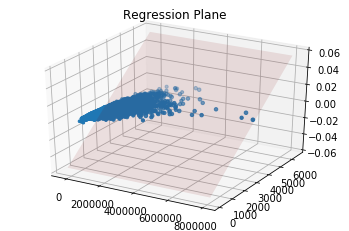

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
modela = multiple.coef_[0][0]
modeli = multiple.coef_[0][1]
modelo = multiple.intercept_
plt.scatter( train['price'], train['sqft_living15'], train['grade'])

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
print(xx, yy)
zz = np.array(ax.get_zlim()).reshape(-1,1)
print(zz)
plt3d = plt.gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.1, color = 'r')

plt.title("Regression Plane")
plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [ ]:
features = [ 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']
target = ['price']

In [ ]:
full_features = LinearRegression()
full_features.fit(train[features], train[target])
full_features.intercept_, full_features.coef_

In [ ]:
train_true = train[target]
train_pred = full_features.predict(train[features])

test_true = test[target]
test_pred = full_features.predict(test[features])

In [ ]:
print('Train:')
# Train Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_true=train_true, y_pred=train_pred) )
# Train R Squared
print('R Squared: ', r2_score(y_true=train_true, y_pred=train_pred) )
print('Test:')
# Test Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_true=test_true, y_pred=test_pred) )
# Test R Squared
print('R Squared: ', r2_score(y_true=test_true, y_pred=test_pred) )

In [ ]:
np.sqrt(mean_squared_error(y_true=test_true, y_pred=test_pred))

In [ ]:
np.sqrt(mean_squared_error(y_true=train_true, y_pred=train_pred))

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
